In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
%pylab inline
figsize(12, 8)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [80]:
def massage_data(run):
    # Filter some nonsense values
    run.linuxtime = run.linuxtime.apply(datetime.datetime.fromtimestamp)
    run.rpm = run.rpm.apply(lambda x: x if x < 10000 and x >= 0 else np.nan)
    run.ds_volt = run.ds_volt.apply(lambda x: x if x < 400 and x > 100 else np.nan)
    run.ds_cur_48v = run.ds_cur_48v.apply(lambda x: x if x >= 0 else np.nan)
    
    # Fill forward
    run.fillna(method='pad', inplace=True)
    
    run.set_index(run.linuxtime, drop=True, inplace=True)
    del run["linuxtime"]
    del run["time"]
#     del run["soc"]
    for col in run:
        run[col].index = run.index

    return run

In [81]:
i = 7
runs = []
while os.path.exists("test_logs/2016-07-05_run%d.csv"%(i)):
    run = pd.read_csv("test_logs/2016-07-05_run%d.csv"%(i))

    run = massage_data(run)
    runs.append(run)
    i += 1

In [82]:
flag = False
for r in runs:
    if flag:
        run = run.append(r)
    else:
        run = r
        flag = True

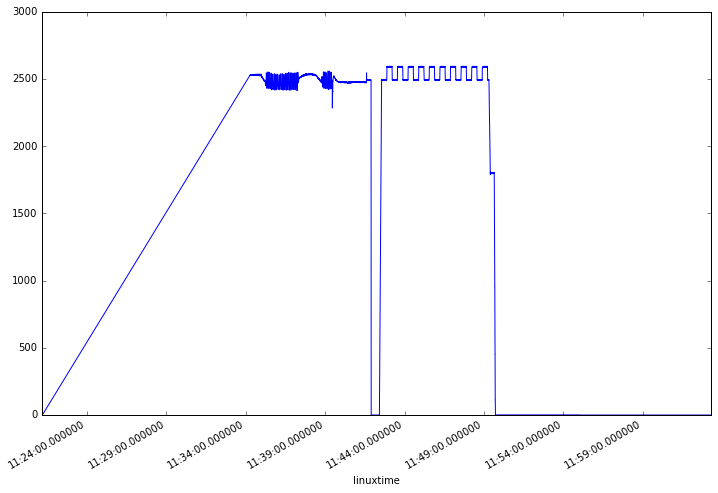

In [83]:
# Get an overview of the time we're concerned with
run.rpm.plot()

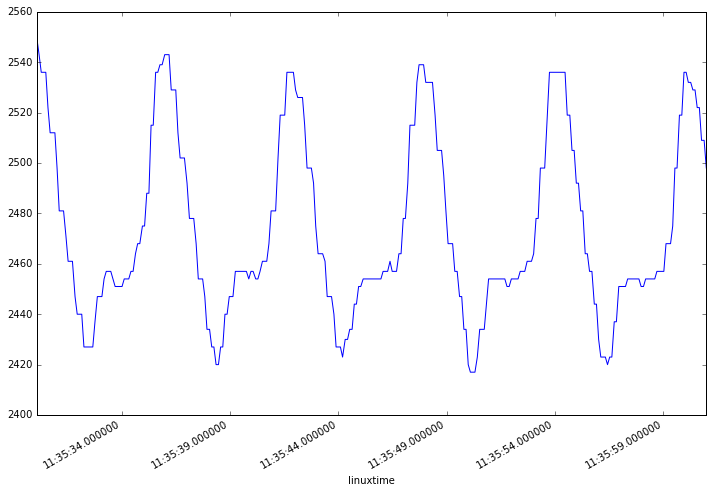

In [84]:
# Look more closely at the range in which we have the bad instability
unstable = run["2016-07-05 11:35:30":"2016-07-05 11:36:00"]
unstable.rpm.plot()

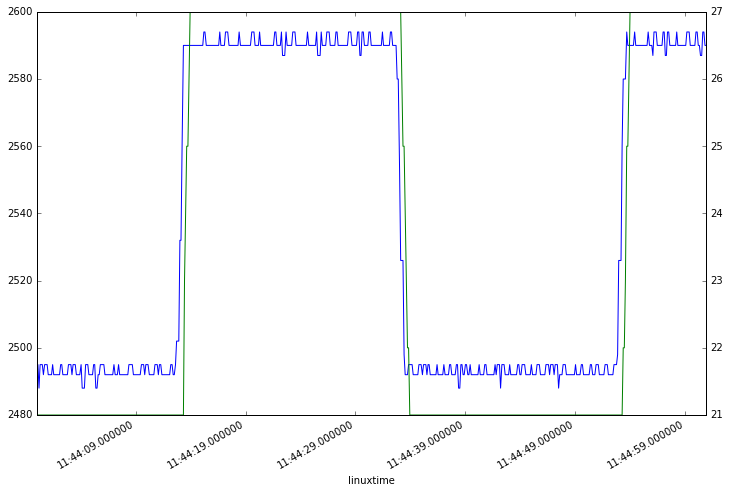

In [85]:
# Look closely at the region with the improved Woodward control settings
stable = run["2016-07-05 11:44":"2016-07-05 11:45:00"]
stable.rpm.plot()
stable.soc.plot(secondary_y=True)